Here i wil investigate the vibrations caused by the building based on 3 10 second long 300 FPS recordings of the USAF Gr4 Elt1 Target.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
from pathlib import Path
# need to append the path to the cilia package to the sys path
sys.path.append(os.path.abspath(os.path.join(Path.cwd(), '..')))

import numpy as np
from Cilia import Powerspectrum
import pims

In [2]:
data = str(Path.cwd().parent / 'data/vibrations')

<Frames>
Source: c:\Users\alana\Documents\MasterThesis_Public\data\vibrations/1.tiff
Length: 2904 frames
Frame Shape: (752, 752)
Pixel Datatype: uint8


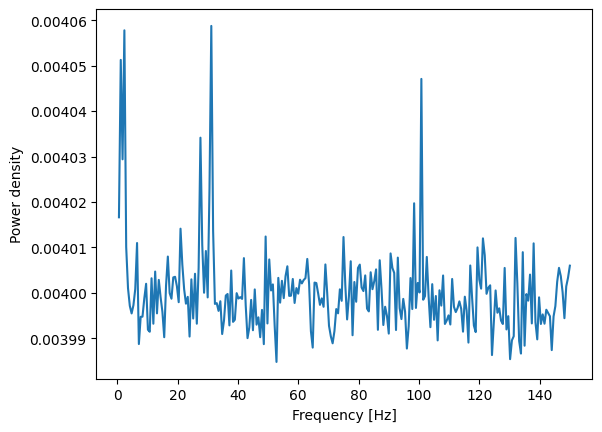

validation10


In [8]:
data1 = pims.open(data + '/1.tiff')
print(data1)
data1 = np.array([f for f in data1[:500]])

pwr1 = Powerspectrum(data1)
pwr1.show_powerspectrum(FPS=300)

The same timeseries but cropped at each end by 200 pixels to drastically downsize the image and allow for the full 10 seconds to be loaded into ram. I suspect, that only the center part of the image can be used to detect the vibrations, as the USAF target was centered and the edges were only glass.

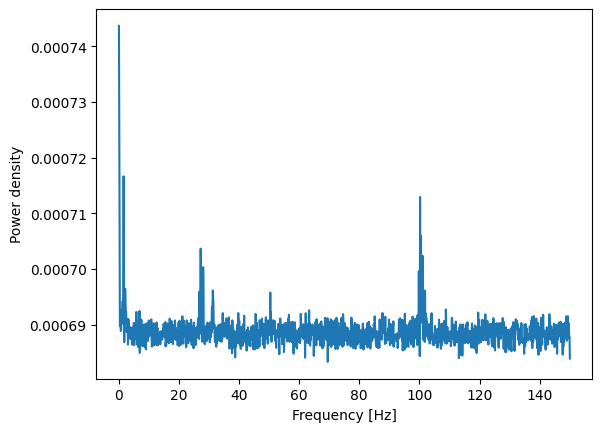

validation10


In [5]:
data1 = pims.process.crop(pims.open(data + '/1.tiff')[:], ((100,100), (100,100)))[:]
data1 = np.array([f for f in data1])

pwr1 = Powerspectrum(data1)
pwr1.show_powerspectrum(FPS=300)

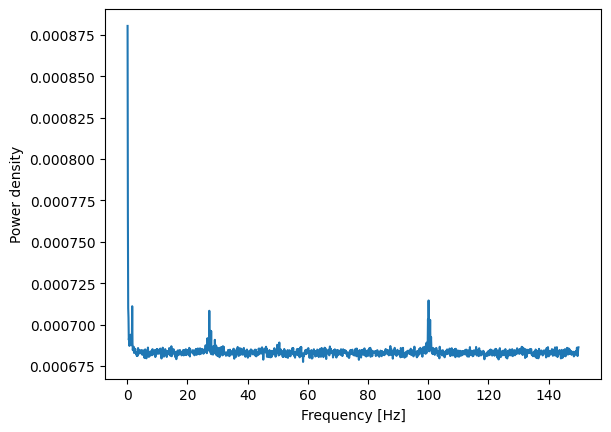

validation10


In [6]:
data2 = pims.process.crop(pims.open(data + '/2.tiff')[:], ((100,100), (100,100)))[:]
data2 = np.array([f for f in data2])

pwr2 = Powerspectrum(data2)
pwr2.show_powerspectrum(FPS=300)

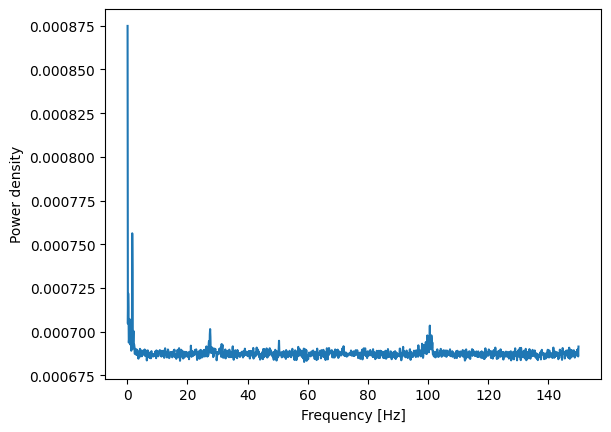

validation10


In [7]:
data3 = pims.process.crop(pims.open(data + '/3.tiff')[:], ((100,100), (100,100)))[:]
data3 = np.array([f for f in data3])

pwr3 = Powerspectrum(data3)
pwr3.show_powerspectrum(FPS=300)

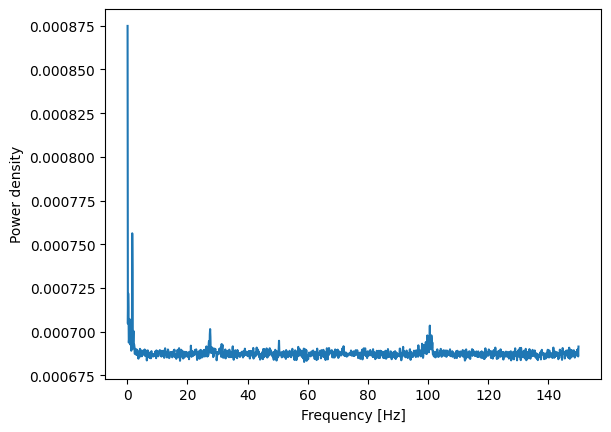

validation10


In [8]:
data4 = pims.process.crop(pims.open(data + '/3.tiff')[:], ((100,100), (100,100)))[:]
data4 = np.array([f for f in data4])

pwr4 = Powerspectrum(data4)
pwr4.show_powerspectrum(FPS=300)

In [9]:
#now combine the data:
freq1 = pwr1.freqs; freq2 = pwr2.freqs; freq3 = pwr3.freqs; freq4 = pwr4.freqs
power1 = pwr1.mean_powerspectrum; power2 = pwr2.mean_powerspectrum; power3 = pwr3.mean_powerspectrum; power4 = pwr4.mean_powerspectrum

#get the smallest frequency range
min_lenght = min(len(freq1), len(freq2), len(freq3), len(freq4))

freq = freq1[:min_lenght]
power1 = power1[:min_lenght]; power2 = power2[:min_lenght]; power3 = power3[:min_lenght]; power4 = power4[:min_lenght]

power = (power1 + power2 + power3 + power4) / 4

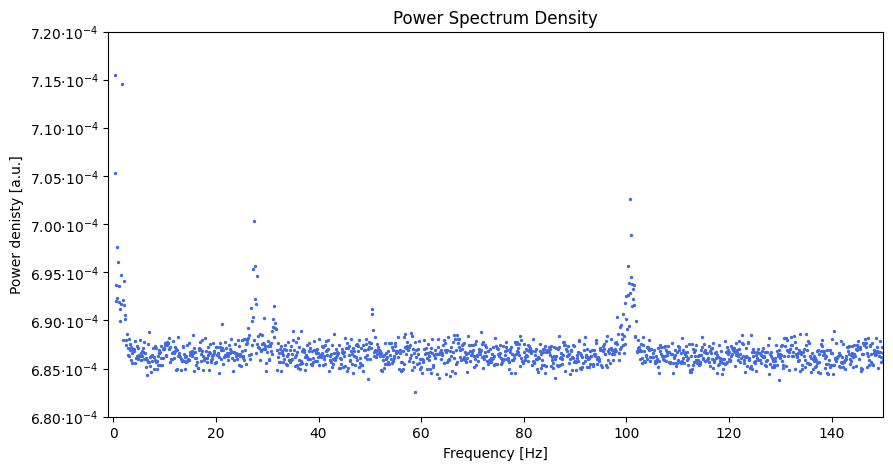

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def sci_formatter(x, pos):
       base_10 = int(np.floor(np.log10(x)))
       trailing = x / 10**base_10
       exp = '{'+str(base_10)+'}'
       return f'{trailing:.2f}$\\cdot 10^{exp}$'

fig, ax = plt.subplots(figsize = (10,5))
ax.set_title('Power Spectrum Density')
ax.scatter(freq, power, s=2, c='royalblue')
ax.set(xlabel='Frequency [Hz]',ylabel='Power denisty [a.u.]',
       xlim=(-1,150), ylim=(0.00068, 0.00072))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(sci_formatter))
plt.show()
np.savetxt(Path.home() / 'iCloudDrive/UNIBE/Master_Thesis/ThesisFigures/Building_Vibrations.txt', np.column_stack((freq, power)), header=' freq\tpower_density', delimiter='\t', newline='\n ', comments='')